# IIC-2433 Minería de Datos UC

- Versiones de librerías, python 3.8.10

- numpy 1.20.3
- sklearn 1.0.2
- matplotlib 3.5.2

In [1]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

In [2]:
faces.data.shape

(400, 4096)


## Actividad en clase

Preprocese el dataset usando **PCA**. Para esto haga lo siguiente:

- Aplique min-max scaler al dataset.
- Calcule PCA con 400 componentes.
- Calcule el número de componentes que retienen el 55% de la varianza del dataset.
- Calcule el número de componentes que retienen el 70% de la varianza del dataset.
- Calcule el número de componentes que retienen el 99% de la varianza del dataset.
- Ajuste el dataset usando un PCA que retenga el 55% de la varianza.
- Ajuste el dataset usando un PCA que retenga el 70% de la varianza.
- Ajuste el dataset usando un PCA que retenga el 99% de la varianza.
- Calcula las pairwise euclidean distances para las tres proyecciones PCA calculadas anteriormente.
- Muestre los histogramas de las tres pairwise euclidean distances.
- ¿Cómo interpreta los histogramas?
- Cuanto termine, me avisa para entregarle una **L (logrado)**.
- Recuerde que las L otorgan un bono en la nota final de la asignatura.
- Pueden trabajar de a dos.

***Tiene hasta el final de la clase.***


# Solución

In [3]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(faces.data)

In [4]:
from sklearn.decomposition import PCA

def min_var(v,exp_var):
    acc = 0
    i=0
    while acc < v:
        acc += exp_var[i]
        i += 1
    return i

In [5]:
pca = PCA(n_components=400)
pca.fit(X)

PCA(n_components=400)

In [6]:
def min_var(v,exp_var):
    acc = 0
    i=0
    while acc < v:
        acc += exp_var[i]
        i += 1
    return i

In [7]:
min_var(0.55,pca.explained_variance_ratio_)

6

In [8]:
min_var(0.7,pca.explained_variance_ratio_)

13

In [9]:
min_var(0.99,pca.explained_variance_ratio_)

260

In [10]:
pca = PCA(n_components=6)
X_6= pca.fit_transform(X)

pca = PCA(n_components=13)
X_13= pca.fit_transform(X)

pca = PCA(n_components=260)
X_260=pca.fit_transform(X)

In [11]:
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
          
def euclidean_pairwise(X):
    n = X.shape[0]
    x = []
    for i in range(0,n-1):
        for j in range(i+1,n):
            dist = distance.euclidean(X[i,],X[j,])
            x.append(dist)
    
    return np.array(x)


def plot_hist(X, title):
    x, bins, patches = plt.hist(x=X, bins='auto', rwidth=0.85)
    plt.grid(axis='y')
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.title(title)
    maxfreq = x.max()
    plt.ylim(ymax=np.ceil(maxfreq))

In [12]:
x_cos_6 = euclidean_pairwise(X_6)
x_cos_13 = euclidean_pairwise(X_13)
x_cos_260 = euclidean_pairwise(X_260)

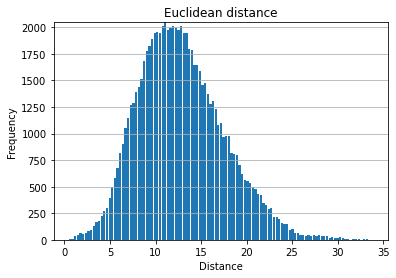

In [13]:
plot_hist(x_cos_6, 'Euclidean distance')

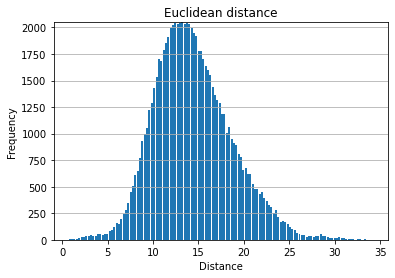

In [14]:
plot_hist(x_cos_13, 'Euclidean distance')

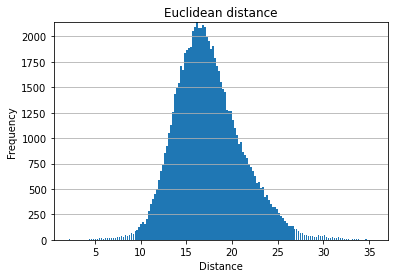

In [15]:
plot_hist(x_cos_260, 'Euclidean distance')